# V46 Faraday Effekt


In [90]:
import numpy as np
import matplotlib
font = {'size': 11.0}
matplotlib.rc('font', **font)
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import curve_fit
import uncertainties
from uncertainties import ufloat
import uncertainties.unumpy as unp 
from uncertainties.unumpy import (nominal_values as noms, std_devs as stds)
import scipy.constants

In [2]:
df1 = pd.read_csv('data/data1.txt'
                 ,sep = ','
                 ,lineterminator='\n'
                 ,skiprows=(3)
                 ,header = 0
                 ,names = ['lambda_0','theta_1','theta_1_min','theta_2','theta_2_min']
                 )
df2 = pd.read_csv('data/data2.txt'
                 ,sep = ','
                 ,lineterminator='\n'
                 ,skiprows=(3)
                 ,header = 0
                 ,names = ['lambda_0','theta_1','theta_1_min','theta_2','theta_2_min']
                 )
df3 = pd.read_csv('data/data3.txt'
                 ,sep = ','
                 ,lineterminator='\n'
                 ,skiprows=(3)
                 ,header = 0
                 ,names = ['lambda_0','theta_1','theta_1_min','theta_2','theta_2_min']
                 )
df4 = pd.read_csv('data/data4.txt'
                 ,sep = ','
                 ,lineterminator='\n'
                 ,skiprows=(0)
                 ,header = (0)
                 #,names = ['Abstand','B-Feld']
                 )

In [3]:
df1['theta1'] = (df1['theta_1'] + 1/60*df1['theta_1_min'])/180 * np.pi
df1['theta2'] = (df1['theta_2'] + 1/60*df1['theta_2_min'])/180 * np.pi
df1 = df1.drop(columns = ['theta_1','theta_1_min','theta_2','theta_2_min'])
df1['theta'] = np.abs(0.5*(df1['theta1']-df1['theta2']))

df2['theta1'] = (df2['theta_1'] + 1/60*df2['theta_1_min'])/180 * np.pi
df2['theta2'] = (df2['theta_2'] + 1/60*df2['theta_2_min'])/180 * np.pi
df2 = df2.drop(columns = ['theta_1','theta_1_min','theta_2','theta_2_min'])
df2['theta'] = np.abs(0.5*(df2['theta1']-df2['theta2']))

df3['theta1'] = (df3['theta_1'] + 1/60*df3['theta_1_min'])/180 * np.pi
df3['theta2'] = (df3['theta_2'] + 1/60*df3['theta_2_min'])/180 * np.pi
df3 = df3.drop(columns = ['theta_1','theta_1_min','theta_2','theta_2_min'])
df3['theta'] = np.abs(0.5*(df3['theta1']-df3['theta2']))

In [7]:
df1['theta_norm'] = df1['theta']/1.296
df2['theta_norm'] = df2['theta']/1.36
df3['theta_norm'] = df3['theta']/5.11

In [11]:
df1['theta_frei'] = np.abs(df1['theta_norm']-df3['theta_norm'])
df2['theta_frei'] = np.abs(df2['theta_norm']-df3['theta_norm'])

In [88]:
df4

,Abstand,B-Feld
0,-10,1
1,-5,8
2,0,39
3,5,197
4,10,396
5,15,426
6,20,412
7,25,315
8,30,83
9,35,17


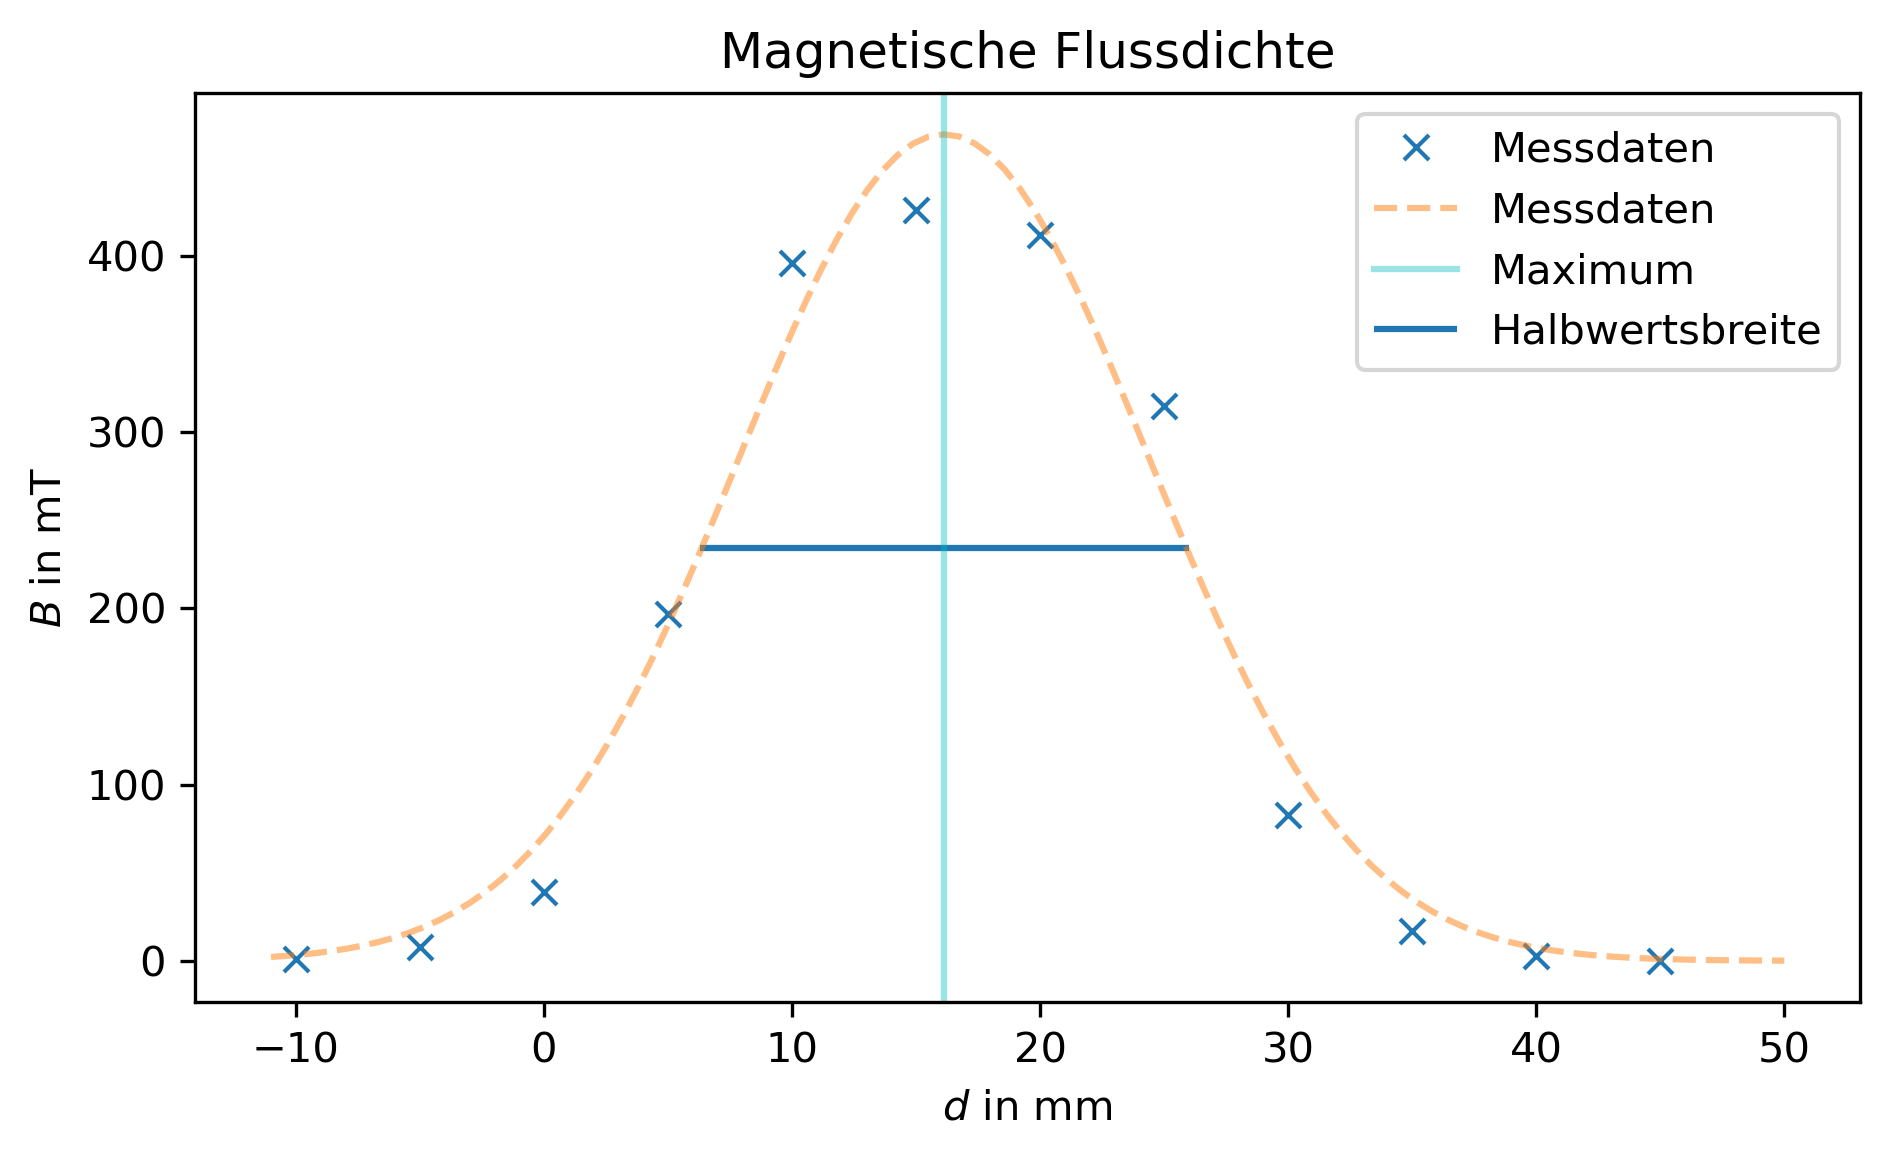

In [84]:
def gauß(x,a,b,c):
    return a*np.exp(-((x-b)/(2*c))**(2))

params0,cov = curve_fit(gauß,df4['Abstand'],df4['B-Feld'])
errors0 = np.sqrt(np.diag(cov))
params0_err = unp.uarray(params0,errors0)
err0 = params0_err[0]*df1['lambda_0']**2+params0_err[1]

plt.figure(figsize=(6.4,3.96),dpi=300)
plt.plot(df4['Abstand']
         ,df4['B-Feld']
         ,marker = 'x'
         ,ls = ''
         ,label = 'Messdaten'
        )
plt.plot(np.linspace(-11,50,100)
         ,gauß(np.linspace(-11,50,100),*params0)
         ,ls = '--'
         ,alpha = 0.5
         ,label = 'Messdaten'
        )
plt.hlines(y = 0.5*gauß(np.linspace(-11,50,100),*params0)[44]
           ,xmin = 6.3
           ,xmax = 26
           ,label = 'Halbwertsbreite'
          )
plt.axvline(x = np.linspace(-11,50,100)[44]
            ,color = 'c'
            ,alpha = 0.4
            ,label = 'Maximum'
            )
plt.ylabel(f'$B$ in mT')
plt.xlabel('$d$ in mm')
plt.title('Magnetische Flussdichte')
plt.legend(loc = 'best')
plt.tight_layout()

In [66]:
gauß(np.linspace(-11,50,100),*params0)[44]

469.04226631755944

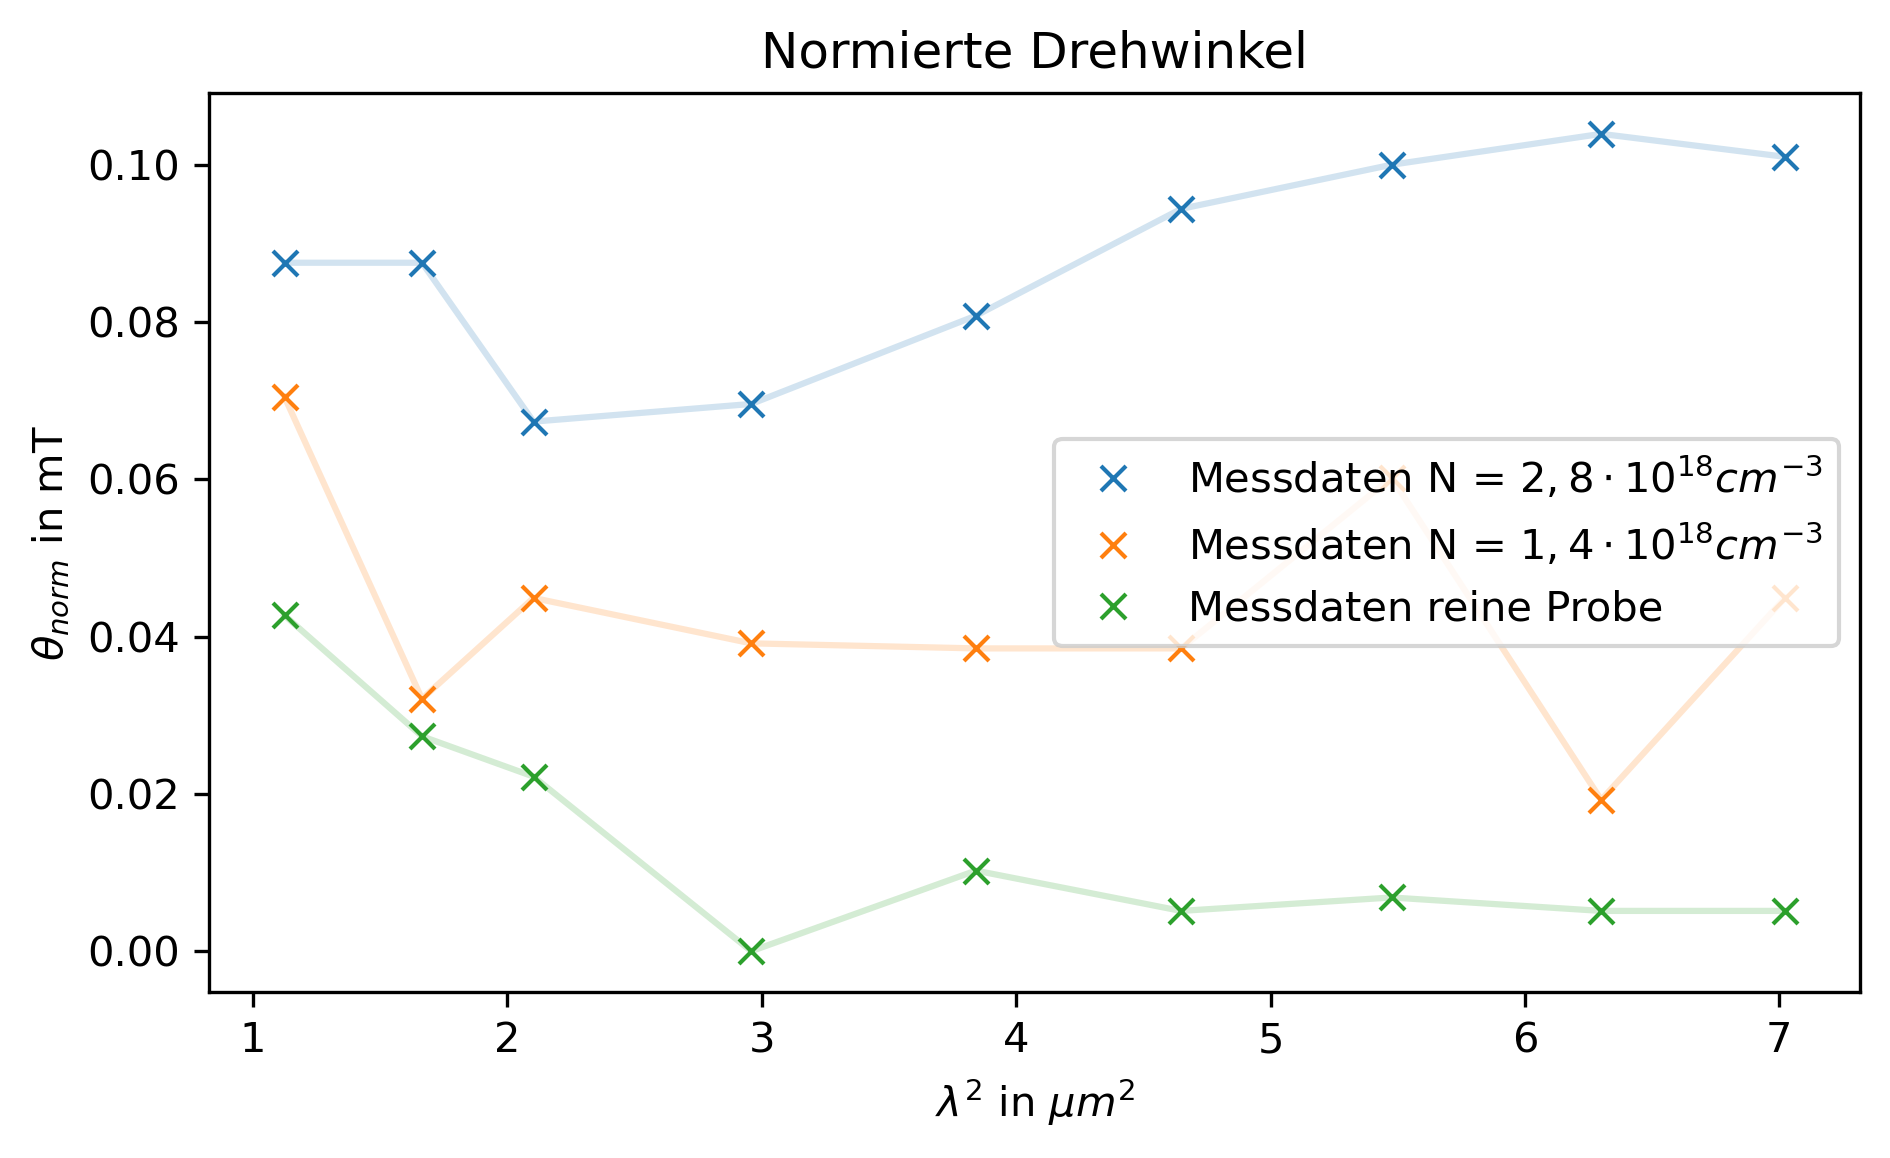

In [44]:
plt.figure(figsize=(6.4,3.96),dpi=300)
plt.plot(df1['lambda_0']**2
         ,np.abs(df1['theta_norm'])
         ,ls = '-'
         ,alpha = 0.2
         ,color = '#1f77b4'
        )
plt.plot(df1['lambda_0']**2
         ,np.abs(df1['theta_norm'])
         ,marker = 'x'
         ,ls = ''
         ,label = r'Messdaten N = $2,8 \cdot 10^{18} cm^{-3}$'
         ,color = '#1f77b4'
        )
plt.plot(df2['lambda_0']**2
         ,np.abs(df2['theta_norm'])
         ,ls = '-'
         ,alpha = 0.2
         ,color = '#ff7f0e'
        )
plt.plot(df2['lambda_0']**2
         ,np.abs(df2['theta_norm'])
         ,marker = 'x'
         ,ls = ''
         ,label = r'Messdaten N = $1,4 \cdot 10^{18} cm^{-3}$'
         ,color = '#ff7f0e'
        )
plt.plot(df3['lambda_0']**2
         ,np.abs(df3['theta_norm'])
         ,ls = '-'
         ,alpha = 0.2
         ,color = '#2ca02c'
        )
plt.plot(df3['lambda_0']**2
         ,np.abs(df3['theta_norm'])
         ,marker = 'x'
         ,ls = ''
         ,label = 'Messdaten reine Probe'
         ,color = '#2ca02c'
        )
plt.ylabel(r'$\theta_{norm}$ in mT')
plt.xlabel(r'$\lambda^2$ in $\mu m^2$')
plt.title('Normierte Drehwinkel')
plt.legend(loc = 'best')
plt.tight_layout()

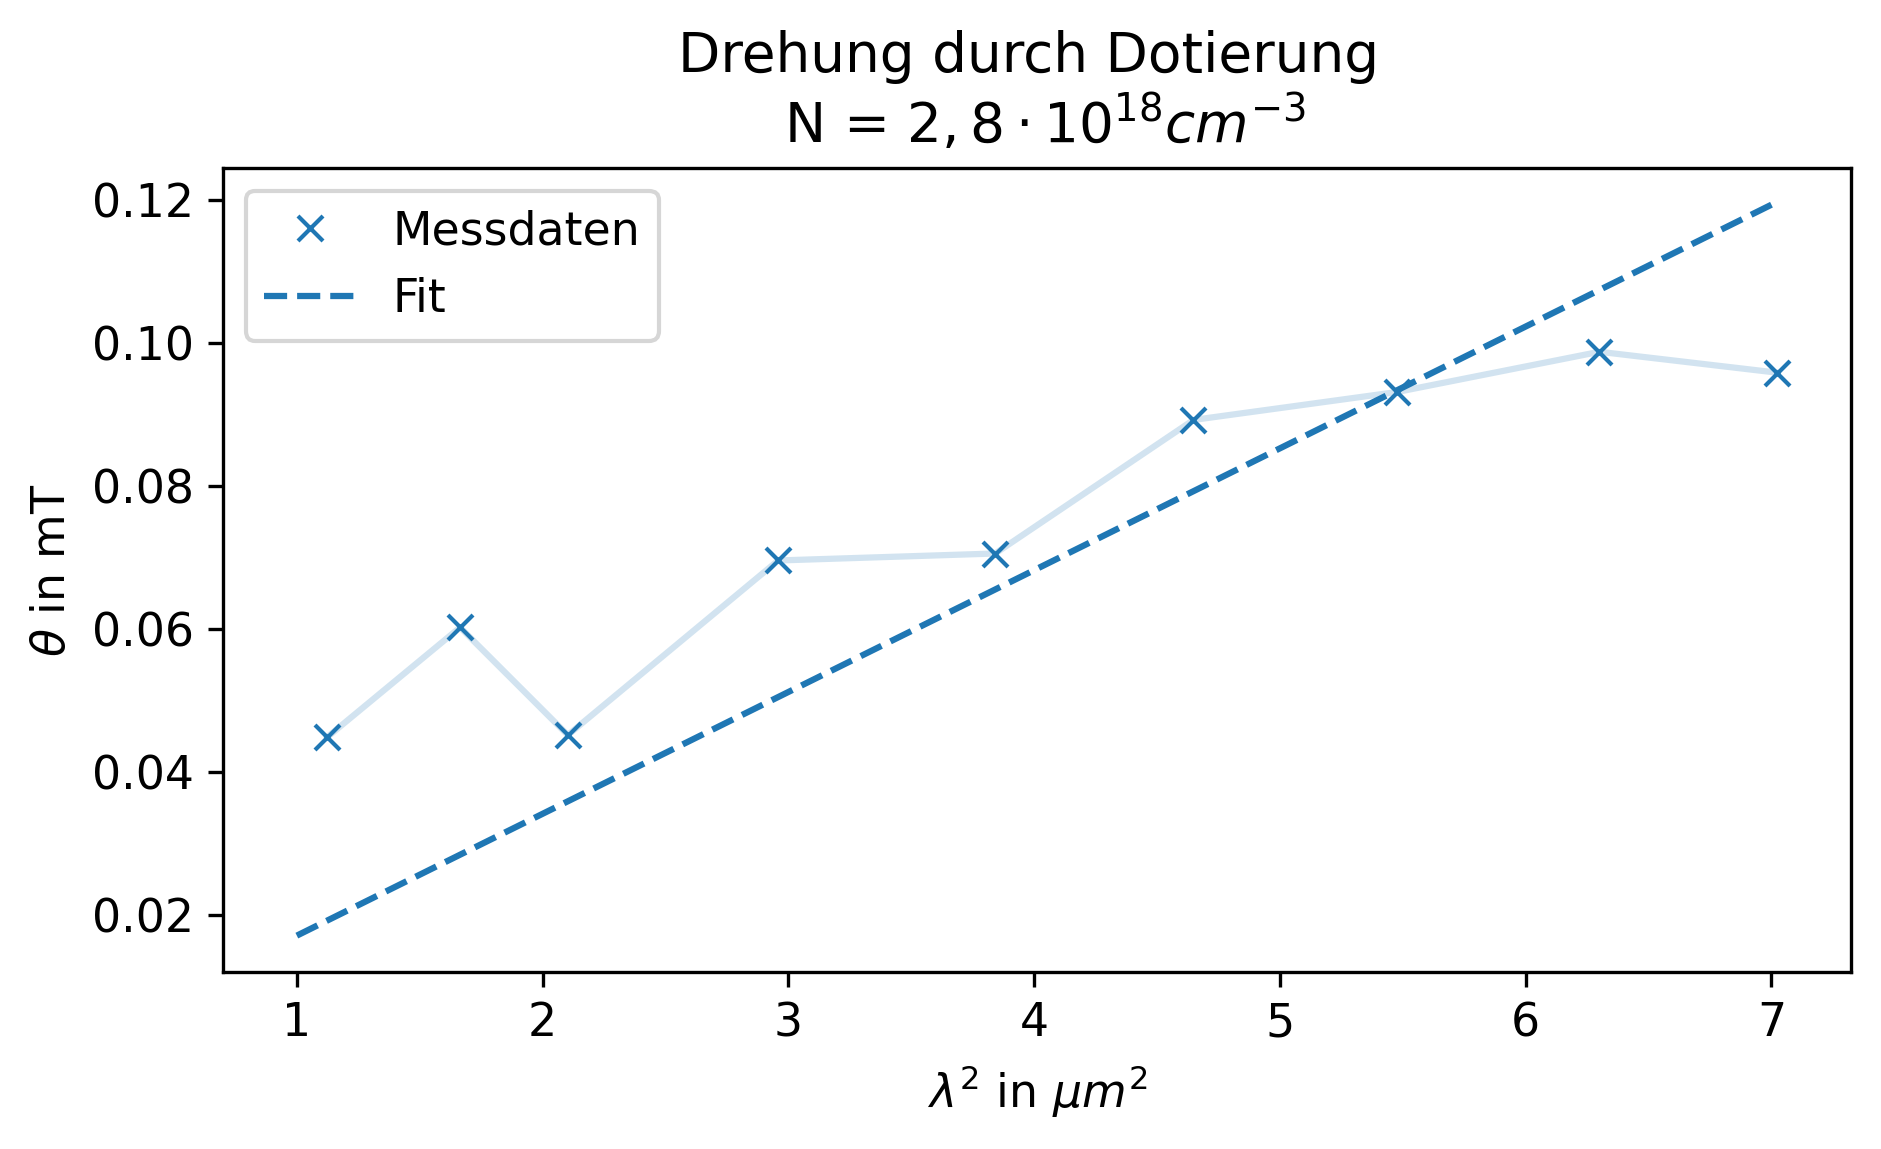

In [328]:
def f(x,m):
    return m*x

params1,cov = curve_fit(f,df1['lambda_0']**2,df1['theta_frei'])
errors1 = np.sqrt(np.diag(cov))
params1_err = unp.uarray(params1,errors1)
err1 = params1_err[0]*df1['lambda_0']**2


plt.figure(figsize=(6.4,3.96),dpi=300)
plt.plot(df1['lambda_0']**2
         ,df1['theta_frei']
         ,ls = '-'
         ,alpha = 0.2
         ,color = '#1f77b4'
        )
plt.plot(df1['lambda_0']**2
         ,df1['theta_frei']
         ,marker = 'x'
         ,ls = ''
         ,label = r'Messdaten'
         ,color = '#1f77b4'
        )
plt.plot(np.linspace(1,7,100)
         ,f(np.linspace(1,7,100),*params1)
         #,marker = 'x'
         ,ls = '--'
         ,label = r'Fit'
         #,color = '#1f77b4'
        )
plt.ylabel(r'$\theta$ in mT')
plt.xlabel(r'$\lambda^2$ in $\mu m^2$')
plt.title('Drehung durch Dotierung \n N = $2,8 \cdot 10^{18} cm^{-3}$')
plt.legend(loc = 'best')
plt.tight_layout()

In [329]:
df2.drop([1,7])

,lambda_0,theta1,theta2,theta,theta_norm,theta_frei
0,1.060,5.639450,5.831145,0.095848,0.070476,0.027782
2,1.450,5.637413,5.759587,0.061087,0.044917,0.022716
3,1.720,5.829400,5.722935,0.053233,0.039142,0.039142
4,1.960,5.811946,5.916666,0.052360,0.038500,0.028253
5,2.156,5.951573,5.846853,0.052360,0.038500,0.033377
6,2.340,6.259042,6.422812,0.081885,0.060210,0.053379
8,2.650,6.038839,5.916666,0.061087,0.044917,0.039793


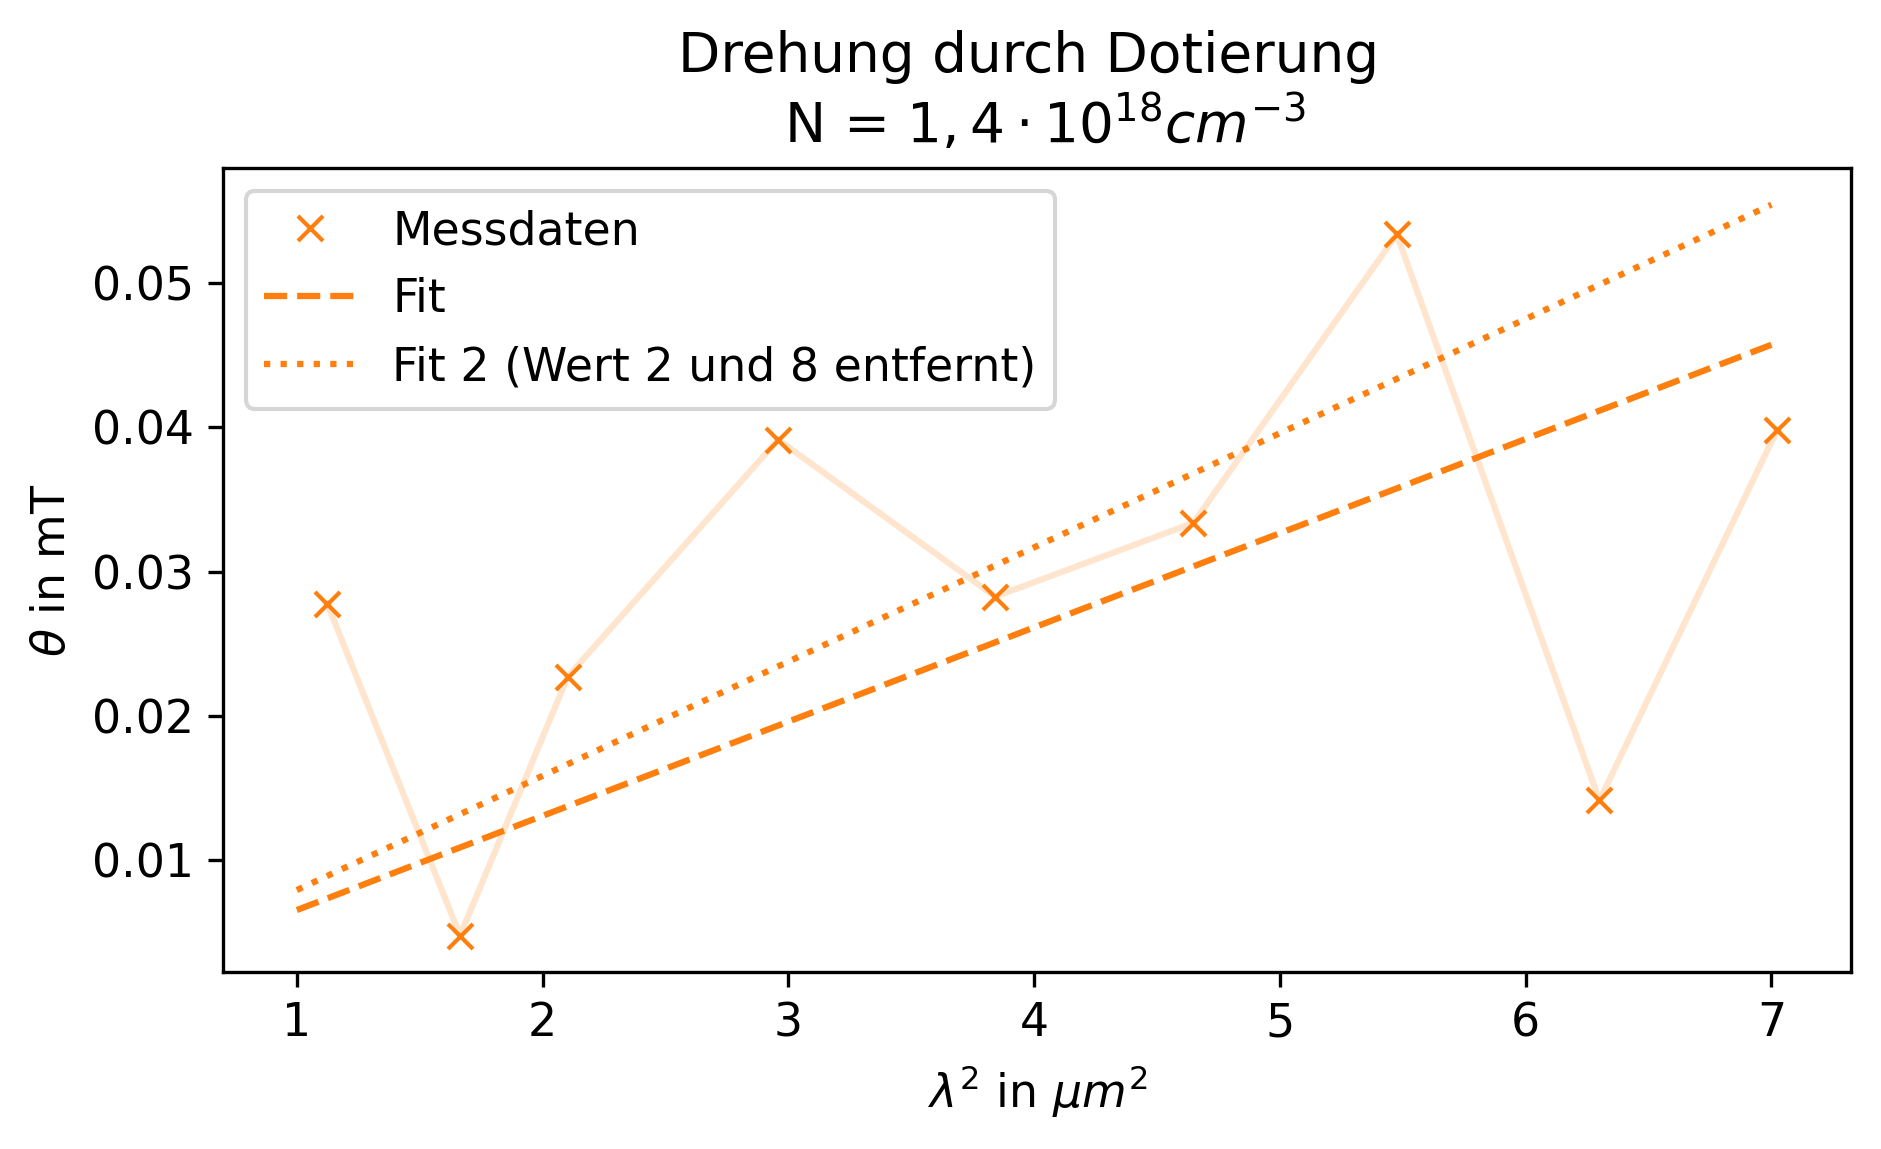

In [334]:
params2,cov = curve_fit(f,df2['lambda_0']**2,df2['theta_frei'])
errors2 = np.sqrt(np.diag(cov))
params2_err = unp.uarray(params2,errors2)
err2 = params2_err[0]*df2['lambda_0']**2

params3,cov = curve_fit(f,df2.drop([1,7])['lambda_0']**2,df2.drop([1,7])['theta_frei'])
errors3 = np.sqrt(np.diag(cov))
params3_err = unp.uarray(params3,errors3)
err3 = params3_err[0]*df2['lambda_0']**2

plt.figure(figsize=(6.4,3.96),dpi=300)
plt.plot(df2['lambda_0']**2
         ,df2['theta_frei']
         ,ls = '-'
         ,alpha = 0.2
         ,color = '#ff7f0e'
        )
plt.plot(df2['lambda_0']**2
         ,df2['theta_frei']
         ,marker = 'x'
         ,ls = ''
         ,label = r'Messdaten'
         ,color = '#ff7f0e'
        )
plt.plot(np.linspace(1,7,100)
         ,f(np.linspace(1,7,100),*params2)
         #,marker = 'x'
         ,ls = '--'
         ,label = r'Fit'
         ,color = '#ff7f0e'
        )
plt.plot(np.linspace(1,7,100)
         ,f(np.linspace(1,7,100),*params3)
         #,marker = 'x'
         ,ls = ':'
         ,label = r'Fit 2 (Wert 2 und 8 entfernt)'
         ,color = '#ff7f0e'
        )
plt.ylabel(r'$\theta$ in mT')
plt.xlabel(r'$\lambda^2$ in $\mu m^2$')
plt.title('Drehung durch Dotierung \n N = $1,4 \cdot 10^{18} cm^{-3}$')
plt.legend(loc = 'best')
plt.tight_layout()

## Rechnung:

Rechnung für df1:

In [335]:
params1_err

array([0.017055903053305625+/-0.0014481268016473395], dtype=object)

In [358]:
params2_err

array([0.006531727731299743+/-0.001211222806292351], dtype=object)

In [359]:
params3_err

array([0.007918540562469734+/-0.0011360270413653959], dtype=object)

In [336]:
B = gauß(np.linspace(-11,50,100),*params0)[44]*10**(-3)
B = 426*10**(-3)

In [337]:
B

0.426

In [338]:
N = 2.8*10**(24)

In [339]:
params1_err

array([0.017055903053305625+/-0.0014481268016473395], dtype=object)

In [340]:
e = scipy.constants.e
c = scipy.constants.c
eps = scipy.constants.epsilon_0
n = 3.34
a = params1_err[0]*10**(15)
m_e = scipy.constants.m_e
r_th = 0.067

In [341]:
a

17055903053305.625+/-1448126801647.3396

In [342]:
eps


8.8541878128e-12

In [343]:
m = unp.sqrt(((e**3)*N*B)/(8*(np.pi**2)*eps*(c**3)*n*a))

In [344]:
m

array(6.761429552895748e-32+/-2.870386669763885e-33, dtype=object)

In [345]:
r1 = m/m_e

In [354]:
a = params3_err[0]*10**(15)
N = 1.4*10**(24)
m = unp.sqrt(((e**3)*N*B)/(8*(np.pi**2)*eps*(c**3)*n*a))

In [360]:
m

array(7.01678736865902e-32+/-5.03328873005205e-33, dtype=object)

In [355]:
r2 = m/m_e

In [361]:
r1

0.0742248847392648+/-0.0031510218076457037

In [362]:
r2

0.07702812394985181+/-0.005525388868209868

In [356]:
(r1-r_th)/r_th

0.10783410058604162+/-0.04703017623351797

In [357]:
(r2-r_th)/r_th

0.14967349178883296+/-0.08246849057029654